# Explore here

It's recommended to use this notebook for exploration purposes.

In [76]:

pip install lxml

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [77]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# descargar data 

url = "https://es.wikipedia.org/wiki/Leucocito"
response = requests.get(url, time.sleep(10))
soup = BeautifulSoup(response.text, 'html')

# buscar html requerido 

table = soup.find('table', class_='wikitable')
headers = [header.text for header in table.find_all('th')]

rows = []
for row in table.find_all('tr')[1:]:  
    cells = row.find_all('td')
    rows.append([cell.text for cell in cells])

# crear DF
 
df = pd.DataFrame(rows, columns=headers)
# print(df.head())
# df.shape


In [89]:
# eliminar valores no utiles
df_final = df.drop(['Apariencia microscópica', 'Diagrama', '[7]\u200b Principal objetivo', '[4]\u200b Núcleo', '[4]\u200b Gránulos', '[4]\u200b Vida media[7]\u200b\n' ], axis=1)

# cambiar valores especificos

df_final.at[3, 'Diámetro (μm)'] = '7-15'
df_final.at[4, 'Diámetro (μm)'] = '12-15'

# eliminar caracteres % 
 
df_final['Porcentaje aproximado en adultos'] = df_final['Porcentaje aproximado en adultos'].str.replace('%', '').astype('float') / 100
print(df_final) 



         Tipo  Porcentaje aproximado en adultos Diámetro (μm)
0  Neutrófilo                             0.620         10-12
1  Eosinófilo                             0.023         10-12
2    Basófilo                             0.004         12-15
3   Linfocito                             0.300          7-15
4    Monocito                             0.053         12-15


In [90]:
import sqlite3

# Conectar y crear base de datos
conn = sqlite3.connect('leucocito.db')

# Guardar el DataFrame en la base de datos
df_final.to_sql('leucocito', conn, if_exists='replace', index=False)

# Cerrar la conexión
conn.close()

In [91]:
# Conectar a la base de datos
conn = sqlite3.connect('leucocito.db')

# Leer los datos de la tabla
df_leido = pd.read_sql('SELECT * FROM leucocito', conn)

# Cerrar la conexión
conn.close()

# Mostrar los datos leídos
print("DataFrame leído de la base de datos:")
print(df_leido)

DataFrame leído de la base de datos:
         Tipo  Porcentaje aproximado en adultos Diámetro (μm)
0  Neutrófilo                             0.620         10-12
1  Eosinófilo                             0.023         10-12
2    Basófilo                             0.004         12-15
3   Linfocito                             0.300          7-15
4    Monocito                             0.053         12-15


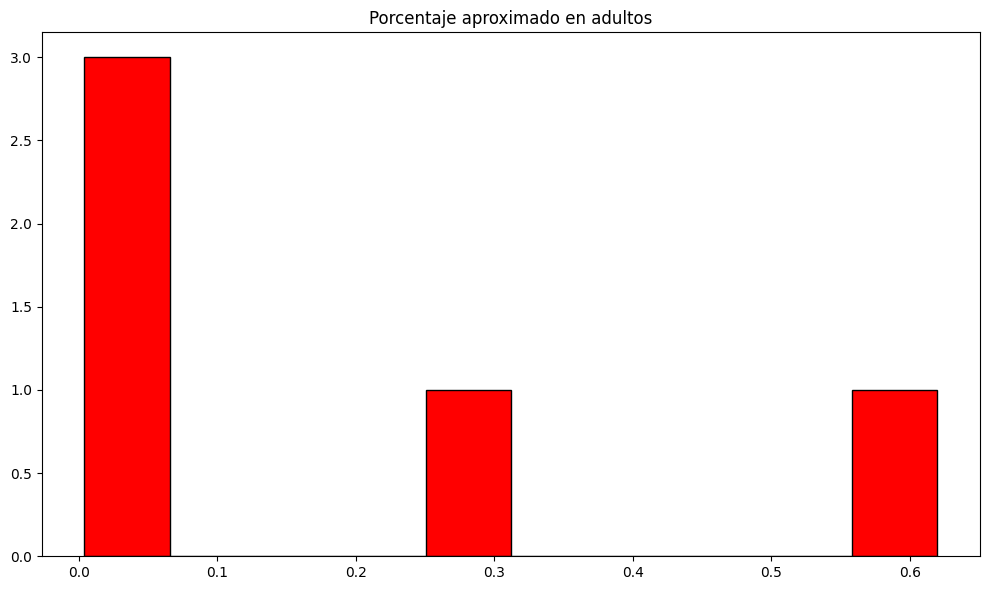

In [92]:
# Histogramas

df_final.hist(figsize=(10, 6), bins=10, color='red', edgecolor='black', grid=False)
plt.tight_layout()  
plt.show()



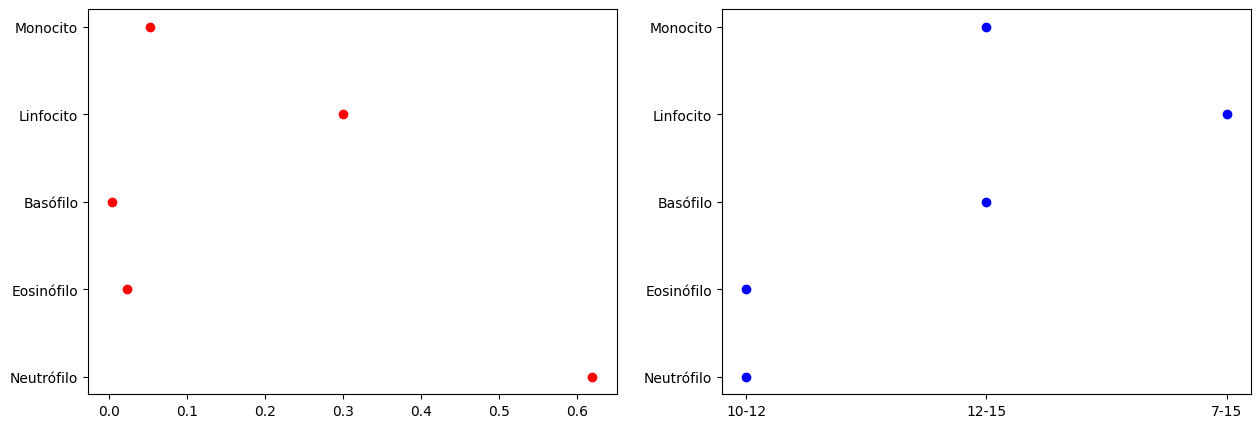

In [93]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].scatter(df_leido['Porcentaje aproximado en adultos'], df_leido['Tipo'], color='red')
axes[1].scatter(df_leido['Diámetro (μm)'], df_leido['Tipo'], color='blue')


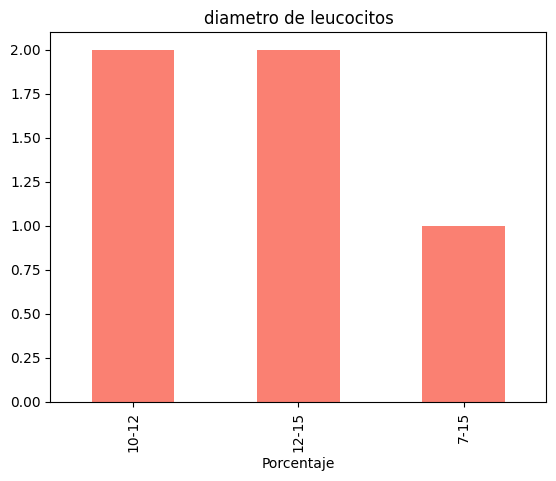

In [97]:
# Gráfico de barras del departamento

df_leido['Diámetro (μm)'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Porcentaje')
plt.title('diametro de leucocitos')
plt.show()